In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

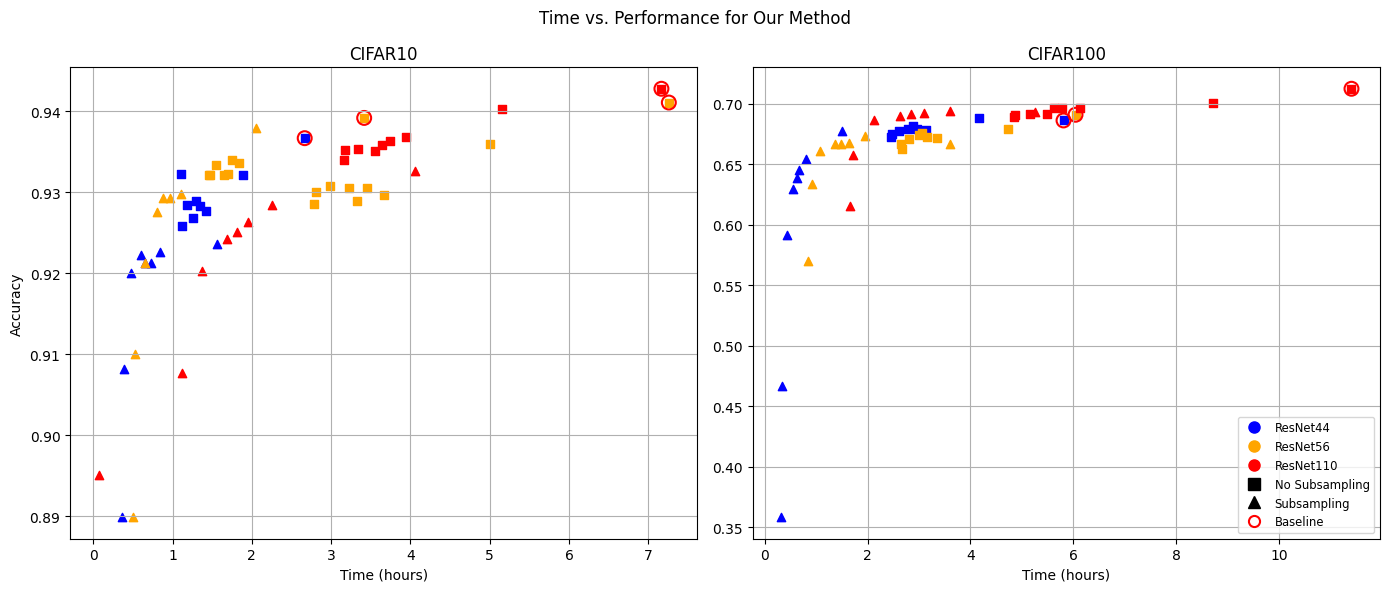

In [8]:
# Load the dataset
df = pd.read_csv('CP - Resultados - Main.csv')

# Convert time to hours
def time_to_hours(time_str):
    try:
        h, m, s = map(int, time_str.strip().split(':'))
        return (h * 3600 + m * 60 + s) / 3600
    except:
        return np.nan

df['Time_hours'] = df['Time'].apply(time_to_hours)
df = df.dropna(subset=['Time_hours', 'Acc'])

# Filter datasets for CIFAR10 and CIFAR100
df_cifar10 = df[df['Dataset'] == 'CIFAR10']
df_cifar100 = df[df['Dataset'] == 'CIFAR100']

# Assign colors manually to architectures
architecture_colors = {
    'RESNET44': 'blue',
    'RESNET56': 'orange',
    'RESNET110': 'red'
}

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Function to plot dataset with custom legend and colors
def plot_data(ax, dataset, title):
    for arch, color in architecture_colors.items():
        arch_data = dataset[dataset['Architecture'] == arch]
        no_subsample = arch_data[arch_data['Subsampling'] == 'Sem']
        with_subsample = arch_data[arch_data['Subsampling'] == 'Com']
        
        # Plot standard points with square (no subsample) and triangle (with subsample) markers
        ax.scatter(no_subsample['Time_hours'], no_subsample['Acc'], color=color, marker='s')
        ax.scatter(with_subsample['Time_hours'], with_subsample['Acc'], color=color, marker='^')
        
        # Highlight points with missing CP or EP Ann. with a red circled outline
        missing_points = arch_data[(arch_data['CP'] == '-') & (arch_data['EP Ann.'] == '-')]
        ax.scatter(missing_points['Time_hours'], missing_points['Acc'], facecolor='none', edgecolor='red', marker='o', s=100, linewidth=1.5)

    ax.set_title(title)
    ax.set_xlabel('Time (hours)')
    ax.grid(True)

# Plot for CIFAR10 and CIFAR100
plot_data(ax1, df_cifar10, 'CIFAR10')
plot_data(ax2, df_cifar100, 'CIFAR100')
ax1.set_ylabel('Accuracy')

# Custom Legend
handles = [
    plt.Line2D([0], [0], marker='o', color='blue', label='ResNet44', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], marker='o', color='orange', label='ResNet56', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], marker='o', color='red', label='ResNet110', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], marker='s', color='black', label='No Subsampling', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], marker='^', color='black', label='Subsampling', markersize=8, linestyle='None'),
    plt.Line2D([0], [0], marker='o', color='none', markeredgecolor='red', label='Baseline', markersize=8, linestyle='None', markeredgewidth=1.5)
]
ax2.legend(handles=handles, loc='lower right', ncol=1, fontsize='small')

# Adjust layout
fig.suptitle('Time vs. Performance for Our Method')
plt.tight_layout()

# Save the figure as a PDF file
fig.savefig('./figures/time_vs_performance.pdf')

plt.show()
